
#### HA3 - Unsupervised Learning (Clustering)

GROUP 19  
Cátia Antunes (60494) - h<br>Donato Aveiro (46269) - h<br>Márcia Vital (59488) - h<br>Sean Gorman (59492) - h

In [ ]:
# Install the following packages if needed:
!pip install yellowbrick 

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, spectral_clustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from sklearn import datasets
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer


## Objective 1: Clustering

Objective 1 - Clustering

    Using the data from the train.csv file determine the best clustering approach able to classify this dataset
    Using the data from the unique_m.csv file determine the best clustering approach able to classify this dataset
    compare both approaches in computational performance and clustering quality (using intrinsic methods)

WARNING: columns may have VERY different ranges. This should be handled adequately

In [51]:
# Load the data
train_df = pd.read_csv("train.csv")
unique_m_df = pd.read_csv("unique_m.csv")

In [52]:
# Print the first 5 rows of the train_df
train_df.head()
# 82 columns

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [53]:
# Print the first 5 rows of the unique_m_df
unique_m_df.head()
# 88 columns

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


Removing the identifier column 
The last column (material) of the unique_m.csv file is simply a label or identifier for each sample, and it does not have any inherent properties or characteristics that relate to the superconducting properties of the material. As a result, it is not useful in analyzing or predicting the superconducting properties of the materials and can be safely discarded from the analysis

In [54]:
# Drop the identifiers (last column) from unique_m.csv
unique_m_df = unique_m_df.iloc[:, :-1]
unique_m_df.head()
# 87 columns

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0


Removing the critical temperature
In this task, the objective is to cluster the superconductivity data based on the available features, which are the various materials properties (such as the atomic mass, atomic radius, and so on). The last column of the dataset, which contains the dependent variable (critical_temp), represents the temperature at which a superconductor becomes a superconductor. This value is not relevant for the clustering analysis because it is not used to group similar data points together based on their intrinsic similarity. Therefore, the last column should be removed from the dataset before performing the clustering analysis.

In [55]:
# Remove the dependent variable (critical_temp) from both datasets 
train_X = train_df.iloc[:, :-1]
unique_m_X = unique_m_df.iloc[:, :-1]

In [56]:
# Print the head of train_X
train_X.head() #81 columns

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809


In [73]:
# Print the head of the unique_m_X
unique_m_X.head() #86

,H,He,Li,Be,B,C,N,O,F,Ne,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


Merging the datasets
We can merge the two datasets because they correspond to the same data instances and contain complementary information. The train.csv file contains the values of various features (such as lattice parameters, atomic weights, and more) that are known to influence superconductivity. The unique_m.csv file contains additional material properties such as the chemical formula, which could provide more insight into the superconducting properties. Merging the two datasets can create a more complete picture of the factors that affect superconductivity and can potentially improve the accuracy of the analysis

In [58]:
# merge the two datasets
merged_X = pd.concat([train_X, unique_m_X], axis=1)
merged_X.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [59]:
print(merged_X.shape)

(21263, 167)


Scaling
Normalization helps to scale the data so that all features have similar ranges of values. If different features have different scales, then some features may dominate the analysis simply because they have larger values, and this may lead to biased results. Normalizing the data allows each feature to contribute equally to the analysis. The MinMaxScaler function from the scikit-learn library is used to scale the data to the range [0,1].

In [60]:
# Normalize the data using min-max scaling
scaler = MinMaxScaler()
train_df_scaled = scaler.fit_transform(train_df)
unique_m_df_scaled = scaler.fit_transform(unique_m_df)
merged_X = scaler.fit_transform(merged_X)

In [61]:
# print 5 rows of the normalized data
#print(merged_X[:5])

[[0.375      0.40587859 0.25394952 0.29972047 0.1649881  0.59572377
  0.54253586 0.59097281 0.15465215 0.51444251 0.53081265 0.42654117
  0.65269887 0.36545744 0.59082102 0.60523738 0.38825823 0.6213875
  0.58791607 0.6480488  0.74205121 0.449      0.23005714 0.35250401
  0.14611369 0.58789312 0.63403343 0.80078125 0.17868716 0.65140728
  0.71273484 0.20598595 0.13104296 0.03203054 0.00233994 0.52864484
  0.47821325 0.39659751 0.07040974 0.30828492 0.34315819 0.24749692
  0.33957838 0.18060129 0.3016472  0.65603085 0.46996646 0.36404011
  0.37031734 0.315747   0.25171184 0.06378725 0.03459559 0.0310893
  0.00781639 0.53508153 0.56949305 0.12290748 0.0169912  0.08906873
  0.09030333 0.3240261  0.14987368 0.02213545 0.00159312 0.18858769
  0.16295731 0.93022662 0.14230687 0.78541917 0.64939929 0.20833333
  0.20952381 0.20222731 0.20329724 0.63909701 0.54685332 0.16666667
  0.15527506 0.14433757 0.14568627 0.         0.         0.
  0.         0.         0.         0.         0.06060606 0

### K-Means (Optimisation)

K-means vs K-means++

Both are clustering algorithms used to group data points into distinct clusters. However, there is a significant difference between these two algorithms in the way they initialize their centroids.
K-means algorithm selects the initial centroids randomly, which can lead to suboptimal cluster formation. On the other hand, K-means++ algorithm improves the initial centroid selection by using a probabilistic approach.
In K-means++, the first centroid is selected randomly from the data points, and then subsequent centroids are selected based on their distance from the already selected centroids. Specifically, the probability of a data point being selected as the next centroid is proportional to the square of its distance from the nearest centroid that has already been chosen.
This process ensures that the centroids are well spread out and reduces the chances of the algorithm getting stuck in local optima. As a result, K-means++ often outperforms K-means in terms of clustering accuracy and convergence speed, especially when dealing with large datasets.

In summary, the main difference between K-means and K-means++ is the method used for selecting initial centroids. K-means uses random initialization, while K-means++ uses a more sophisticated probabilistic approach to select the initial centroids.

In [62]:
## K-Means Clustering - TRAIN DATA

# Find the optimal number of clusters using the elbow method

# KMEANS - Calculate the sum of squared distances for each number of clusters
sum_of_squared_distances_KMEANS = []
sum_of_squared_distances_KMEANSPP = []

K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=0)
    km = km.fit(train_df_scaled)
    sum_of_squared_distances_KMEANS.append(km.inertia_)

# KMEANS++ - Calculate the sum of squared distances for each number of clusters
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km = km.fit(train_df_scaled)
    sum_of_squared_distances_KMEANSPP.append(km.inertia_)

Elbow point for KMEANS: 24565.431751894812
Elbow point for KMEANS++: 24565.40959376629


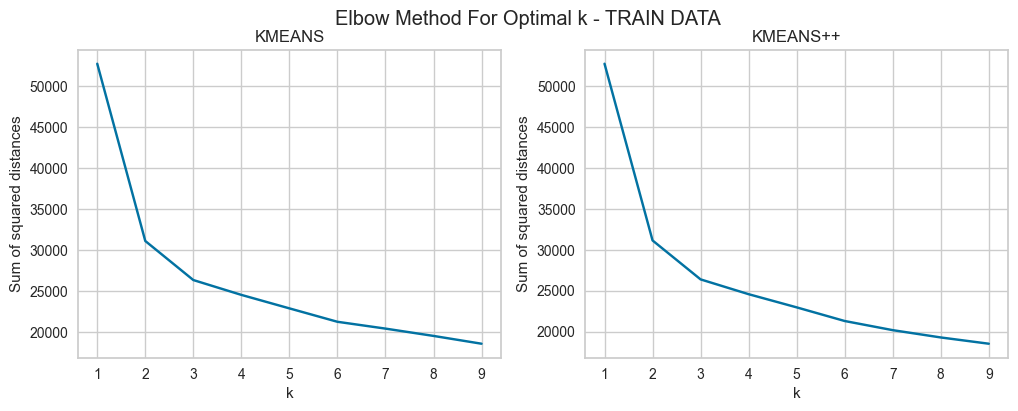

In [63]:
# two plots side by side for comparison (KMEANS vs KMEANS++)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Elbow Method For Optimal k - TRAIN DATA')
ax1.plot(K, sum_of_squared_distances_KMEANS, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Sum of squared distances')
ax1.set_title('KMEANS')

ax2.plot(K, sum_of_squared_distances_KMEANSPP, 'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('Sum of squared distances')
ax2.set_title('KMEANS++')

# show values of the sum of squared distances for each number of clusters
print("Elbow point for KMEANS: " + str(sum_of_squared_distances_KMEANS[3]))
print("Elbow point for KMEANS++: " + str(sum_of_squared_distances_KMEANSPP[3]))

plt.show()

In [64]:
## K-Means Clustering - UNIQUE_M

# Find the optimal number of clusters using the elbow method

# KMEANS - Calculate the sum of squared distances for each number of clusters
sum_of_squared_distances_KMEANS_U = []
sum_of_squared_distances_KMEANSPP_U = []

K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=0)
    km = km.fit(unique_m_df_scaled)
    sum_of_squared_distances_KMEANS_U.append(km.inertia_)

# KMEANS++ - Calculate the sum of squared distances for each number of clusters
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km = km.fit(unique_m_df_scaled)
    sum_of_squared_distances_KMEANSPP_U.append(km.inertia_)

Elbow point for KMEANS:  1421.68924344367
Elbow point for KMEANS++:  1421.6892346969496


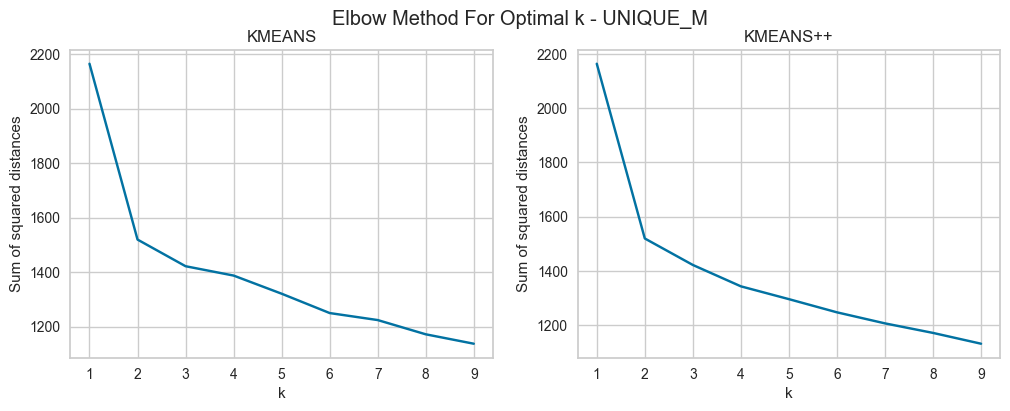

In [65]:
# two plots side by side for comparison (KMEANS vs KMEANS++)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Elbow Method For Optimal k - UNIQUE_M')
ax1.plot(K, sum_of_squared_distances_KMEANS_U, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Sum of squared distances')
ax1.set_title('KMEANS')

ax2.plot(K, sum_of_squared_distances_KMEANSPP_U, 'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('Sum of squared distances')
ax2.set_title('KMEANS++')

# show values of the elbow points
print("Elbow point for KMEANS: ", sum_of_squared_distances_KMEANS_U[2])
print("Elbow point for KMEANS++: ", sum_of_squared_distances_KMEANSPP_U[2])

plt.show()

In [67]:
## K-Means Clustering - MERGED DATA

# Find the optimal number of clusters using the elbow method


# KMEANS - Calculate the sum of squared distances for each number of clusters
sum_of_squared_distances_KMEANS_M = []
sum_of_squared_distances_KMEANSPP_M = []

K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=0)
    km = km.fit(merged_X)
    sum_of_squared_distances_KMEANS_M.append(km.inertia_)

# KMEANS++ - Calculate the sum of squared distances for each number of clusters
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km = km.fit(merged_X)
    sum_of_squared_distances_KMEANSPP_M.append(km.inertia_)

Elbow point for KMEANS:  27397.431232187075
Elbow point for KMEANS++:  27397.431232187075


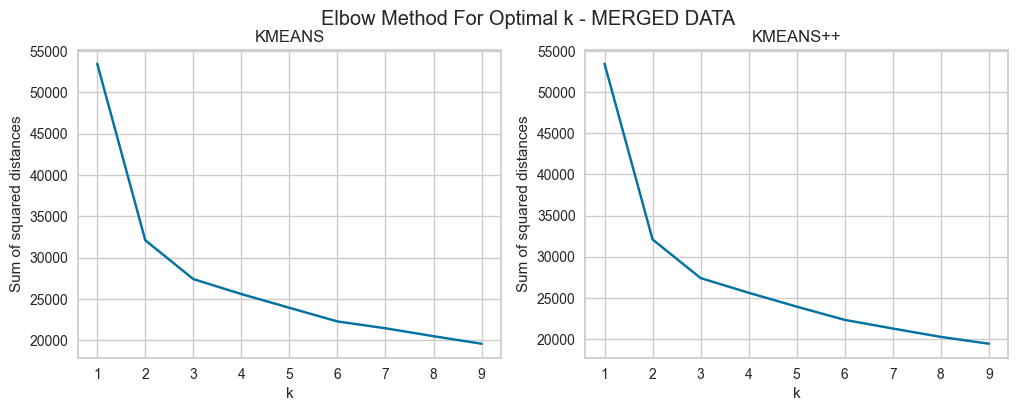

In [68]:
# two plots side by side for comparison (KMEANS vs KMEANS++)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Elbow Method For Optimal k - MERGED DATA')
ax1.plot(K, sum_of_squared_distances_KMEANS_M, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Sum of squared distances')
ax1.set_title('KMEANS')

ax2.plot(K, sum_of_squared_distances_KMEANSPP_M, 'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('Sum of squared distances')
ax2.set_title('KMEANS++')

# show values of the elbow points
print("Elbow point for KMEANS: ", sum_of_squared_distances_KMEANS_M[2])
print("Elbow point for KMEANS++: ", sum_of_squared_distances_KMEANSPP_M[2])

plt.show()

K-Means: Bad elbows?

The elbow method is a commonly used technique for determining the optimal number of clusters in K-means clustering. The basic idea behind the elbow method is to plot the sum of squared distances (SSE) of the data points to their nearest cluster center against the number of clusters, and then look for an "elbow" in the plot where the SSE begins to level off. The idea is that the elbow point represents the point of diminishing returns, where adding more clusters does not result in a significant reduction in SSE.

While the elbow method can be a useful heuristic for selecting the number of clusters, it is not always clear where the elbow point is located, especially if the SSE plot does not exhibit a clear elbow. In such cases, it can be helpful to incorporate additional metrics to supplement the SSE plot. The silhouette score is one such metric that can be used to assess the quality of the clustering results.

The silhouette score measures how similar a data point is to its own cluster compared to other clusters. The score ranges from -1 to 1, with higher values indicating better cluster quality. A score of 1 indicates that the data point is very similar to its own cluster and very dissimilar to other clusters, while a score of -1 indicates the opposite.

In the context of the elbow method, the silhouette score can be used to validate the clustering results obtained at each number of clusters. For example, if the elbow point occurs at 4 clusters, we can compute the silhouette score for each data point at k=4 and compare it to the scores at k=3 and k=5. If the silhouette score is significantly higher at k=4 than at k=3 or k=5, this provides additional evidence that 4 clusters is the optimal number.

Therefore, incorporating the silhouette score into the elbow method can help to provide additional information and validation of the optimal number of clusters, especially when the SSE plot is ambiguous.

https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d

KMEANS:
Elbow value: 3
Elbow score: 26375.343473149012
KMEANS++:
Elbow value: 3
Elbow score: 26375.343473149012


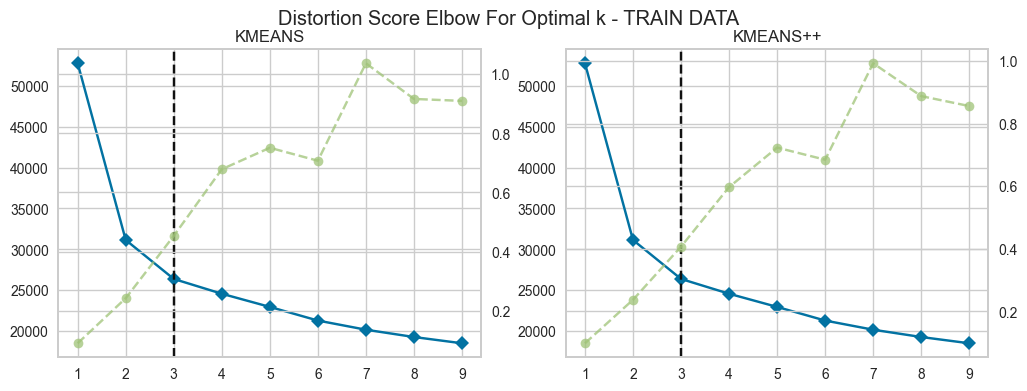

In [69]:
# Elbow plots side by side for comparison (KMEANS vs KMEANS++)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Distortion Score Elbow For Optimal k - TRAIN DATA')
ax1.set_title('KMEANS')
ax2.set_title('KMEANS++')

# KMEANS
km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=0)
visualizer_KMEANS = KElbowVisualizer(km, k=(1,10), ax=ax1)
visualizer_KMEANS.fit(train_df_scaled)

# KMEANS++
km_PP = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer_KMEANSPP = KElbowVisualizer(km_PP, k=(1,10), ax=ax2)
visualizer_KMEANSPP.fit(train_df_scaled)

# Show scores and values for optimal k
print("KMEANS:")
print("Elbow value:", visualizer_KMEANS.elbow_value_)
print("Elbow score:", visualizer_KMEANS.elbow_score_)
print("KMEANS++:")
print("Elbow value:", visualizer_KMEANSPP.elbow_value_)
print("Elbow score:", visualizer_KMEANSPP.elbow_score_)

KMEANS:
Elbow value: 2
Elbow score: 1519.4188915679538
KMEANS++:
Elbow value: 2
Elbow score: 1519.4188915679538


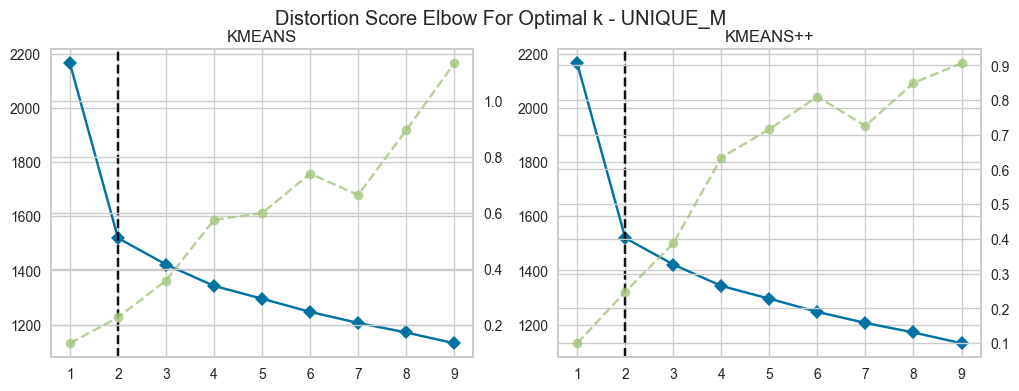

In [71]:
# Elbow plots side by side for comparison (KMEANS vs KMEANS++)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Distortion Score Elbow For Optimal k - UNIQUE_M')
ax1.set_title('KMEANS')
ax2.set_title('KMEANS++')

# KMEANS
km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=0)
visualizer_KMEANS_U = KElbowVisualizer(km, k=(1,10), ax=ax1)
visualizer_KMEANS_U.fit(unique_m_df_scaled)

# KMEANS++
km_PP = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer_KMEANSPP_U = KElbowVisualizer(km_PP, k=(1,10), ax=ax2)
visualizer_KMEANSPP_U.fit(unique_m_df_scaled)

# Show scores and values for optimal k
print("KMEANS:")
print("Elbow value:", visualizer_KMEANS_U.elbow_value_)
print("Elbow score:", visualizer_KMEANS_U.elbow_score_)
print("KMEANS++:")
print("Elbow value:", visualizer_KMEANSPP_U.elbow_value_)
print("Elbow score:", visualizer_KMEANSPP_U.elbow_score_)

KMEANS:
Elbow value: 3
Elbow score: 26375.343473149012
KMEANS++:
Elbow value: 3
Elbow score: 26375.343473149012


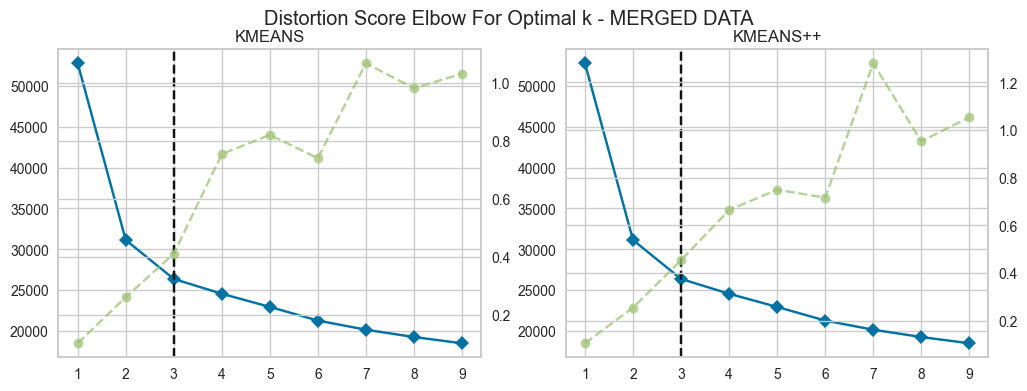

In [72]:
# Elbow plots side by side for comparison (KMEANS vs KMEANS++)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Distortion Score Elbow For Optimal k - MERGED DATA')
ax1.set_title('KMEANS')
ax2.set_title('KMEANS++')


# KMEANS
km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=0)
visualizer_KMEANS_M = KElbowVisualizer(km, k=(1,10), ax=ax1)
visualizer_KMEANS_M.fit(train_df_scaled)

# KMEANS++
km_PP = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer_KMEANSPP_M = KElbowVisualizer(km_PP, k=(1,10), ax=ax2)
visualizer_KMEANSPP_M.fit(train_df_scaled)

# show scores and values # ADD THIS TO PLOT LATER
print("KMEANS:")
print("Elbow value:", visualizer_KMEANS_M.elbow_value_)
print("Elbow score:", visualizer_KMEANS_M.elbow_score_)
print("KMEANS++:")
print("Elbow value:", visualizer_KMEANSPP_M.elbow_value_)
print("Elbow score:", visualizer_KMEANSPP_M.elbow_score_)


KMEANS results

- For the dataset train_df_scaled, the optimal number of clusters is 3, based on the elbow method (With either K-means or K-means++)
- For the dataset unique_m_scaled, the optimal number of clusters is 2, based on the elbow method (With either K-means or K-means++).
- For the dataset merged_df_scaled, the optimal number of clusters is 3, based on the elbow method (With either K-means or K-means++).
- K-Means and K-Means++ perform similarly in terms of clustering quality, but K-Means++ is faster to converge.

### DBSCAN (Optimisation)

(to be continued)

### COMPARING CLUSTERING ALGORITHMS 
(Temporary results: this was not produced with the optimized settings)

In [75]:
results = pd.DataFrame(columns=['KMeans++', 'DBSCAN', 'Agglomerative Clustering', 'Hierarchical Clustering', 'Gaussian Mixture Model'], index=['Train Data', 'Unique_M Data', 'Merged Data'])

In [76]:
#### CLUSTERING ALGORITHMS - FOR TRAIN DATA ####

#KMeans++
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=42)
kmeans.fit(train_df_scaled)
    
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(train_df_scaled)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=7)
agg.fit(train_df_scaled)

# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
hc.fit(train_df_scaled)

#Gaussian Mixture Model
gmm = GaussianMixture(n_components=7, random_state=42)
gmm.fit(train_df_scaled)

# Add to results dataframe
results.iloc[0, 0] = round(silhouette_score(train_df_scaled, kmeans.labels_), 2)
results.iloc[0, 1] = round(silhouette_score(train_df_scaled, dbscan.labels_), 2)
results.iloc[0, 2] = round(silhouette_score(train_df_scaled, agg.labels_), 2)
results.iloc[0, 3] = round(silhouette_score(train_df_scaled, hc.labels_), 2)
results.iloc[0, 4] = round(silhouette_score(train_df_scaled, gmm.predict(train_df_scaled)), 2)

# Print the Silhouette scores
print('Clustering Algorithms for Train Data')
print('KMeans++: {}'.format(round(silhouette_score(train_df_scaled, kmeans.labels_), 2)))
print('DBSCAN: {}'.format(round(silhouette_score(train_df_scaled, dbscan.labels_), 2)))
print('Agglomerative Clustering: {}'.format(round(silhouette_score(train_df_scaled, agg.labels_), 2)))
print('Hierarchical Clustering: {}'.format(round(silhouette_score(train_df_scaled, hc.labels_), 2)))
print('Gaussian Mixture Model: {}'.format(round(silhouette_score(train_df_scaled, gmm.predict(train_df_scaled)), 2)))

Clustering Algorithms for Train Data
KMeans++: 0.34
DBSCAN: 0.11
Agglomerative Clustering: 0.21
Hierarchical Clustering: 0.37
Gaussian Mixture Model: 0.16


In [77]:
#### CLUSTERING ALGORITHMS - FOR UNIQUE_M DATA ####

#KMeans++
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=100, random_state=42)
kmeans.fit(unique_m_df_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(unique_m_df_scaled)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=7)
agg.fit(unique_m_df_scaled)

# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
hc.fit(unique_m_df_scaled)

#Gaussian Mixture Model
gmm = GaussianMixture(n_components=7, random_state=42)
gmm.fit(unique_m_df_scaled)

# Add to results dataframe
results.iloc[1, 0] = round(silhouette_score(unique_m_df_scaled, kmeans.labels_), 2)
results.iloc[1, 1] = round(silhouette_score(unique_m_df_scaled, dbscan.labels_), 2)
results.iloc[1, 2] = round(silhouette_score(unique_m_df_scaled, agg.labels_), 2)
results.iloc[1, 3] = round(silhouette_score(unique_m_df_scaled, hc.labels_), 2)
results.iloc[1, 4] = round(silhouette_score(unique_m_df_scaled, gmm.predict(unique_m_df_scaled)), 2)

# Print the Silhouette scores
print('Clustering Algorithms for Unique_M Data')
print('KMeans++: {}'.format(round(silhouette_score(unique_m_df_scaled, kmeans.labels_), 2)))
print('DBSCAN: {}'.format(round(silhouette_score(unique_m_df_scaled, dbscan.labels_), 2)))
print('Agglomerative Clustering: {}'.format(round(silhouette_score(unique_m_df_scaled, agg.labels_), 2)))
print('Hierarchical Clustering: {}'.format(round(silhouette_score(unique_m_df_scaled, hc.labels_), 2)))
print('Gaussian Mixture Model: {}'.format(round(silhouette_score(unique_m_df_scaled, gmm.predict(unique_m_df_scaled)), 2)))

Clustering Algorithms for Unique_M Data
KMeans++: 0.19
DBSCAN: 0.6
Agglomerative Clustering: 0.14
Hierarchical Clustering: 0.37
Gaussian Mixture Model: -0.03


In [78]:
#### CLUSTERING ALGORITHMS - FOR MERGED DATA ####

#KMeans++
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=100, random_state=42)
kmeans.fit(merged_X)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(merged_X)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=7)
agg.fit(merged_X)

# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
hc.fit(merged_X)

#Gaussian Mixture Model
gmm = GaussianMixture(n_components=7, random_state=42)
gmm.fit(merged_X)

# Add to results dataframe
results.iloc[2, 0] = round(silhouette_score(merged_X, kmeans.labels_), 2)
results.iloc[2, 1] = round(silhouette_score(merged_X, dbscan.labels_), 2)
results.iloc[2, 2] = round(silhouette_score(merged_X, agg.labels_), 2)
results.iloc[2, 3] = round(silhouette_score(merged_X, hc.labels_), 2)
results.iloc[2, 4] = round(silhouette_score(merged_X, gmm.predict(merged_X)), 2)

# Print the Silhouette scores
print('Clustering Algorithms for Merged Data')
print('KMeans++: {}'.format(round(silhouette_score(merged_X, kmeans.labels_), 2)))
print('DBSCAN: {}'.format(round(silhouette_score(merged_X, dbscan.labels_), 2)))
print('Agglomerative Clustering: {}'.format(round(silhouette_score(merged_X, agg.labels_), 2)))
print('Hierarchical Clustering: {}'.format(round(silhouette_score(merged_X, hc.labels_), 2)))
print('Gaussian Mixture Model: {}'.format(round(silhouette_score(merged_X, gmm.predict(merged_X)), 2)))

Clustering Algorithms for Merged Data
KMeans++: 0.22
DBSCAN: 0.14
Agglomerative Clustering: 0.19
Hierarchical Clustering: 0.37
Gaussian Mixture Model: 0.18


In [79]:
results

,KMeans++,DBSCAN,Agglomerative Clustering,Hierarchical Clustering,Gaussian Mixture Model
Train Data,0.34,0.11,0.21,0.37,0.16
Unique_M Data,0.19,0.6,0.14,0.37,-0.03
Merged Data,0.22,0.14,0.19,0.37,0.18


#### Comparison of Clustering Algorithms and datasets (TEMPORARY - THIS IS WITHOUT ALGO OPTIMIZATION)

The table shows the performance scores for five different clustering algorithms (KMeans++, DBSCAN, Agglomerative Clustering, Hierarchical Clustering, and Gaussian Mixture Model) on three different datasets: Train Data, Unique_M Data, and Merged Data. The performance scores are indicated by a single number ranging from -1 to 1, where a higher score indicates better clustering performance.

From the table, we can make the following observations:

    1. The performance scores for each algorithm vary depending on the dataset being used. For example, DBSCAN performs best on Unique_M Data, but its performance is relatively poor on the other two datasets.

    2. KMeans++ and Gaussian Mixture Model generally perform well across all datasets, with scores ranging from 0.16 to 0.34.

    3. Agglomerative Clustering and Hierarchical Clustering both have moderate performance scores on all datasets, with scores ranging from 0.19 to 0.37.

    4. Unique_M Data has the highest scores across all algorithms compared to the other two datasets.

Overall, the table provides a useful comparison of the performance of different clustering algorithms on different datasets. However, it is important to note that the choice of clustering algorithm and its parameters will depend on the specific problem and dataset at hand.

## Objective 2: Evaluating clustering with extrinsic methods

Objective 2 - Evaluating clustering with extrinsic methods

    Create the following Classes for the dependent variable (critical_temp):
        VeryLow - critical_temp in [0.0, 1.0,[
        Low - critical_temp in [1.0, 5.0,[
        Medium - critical_temp in [5.0, 20.0,[
        High - critical_temp in [20.0, 100.0,[
        VeryHigh - critical_temp in >= 100.0

    With the clusters produced in objective 2, using extrinsic methods, verify the quality of each model, for both the train.csv and the unique_m.csv clusters
    Discuss your results and compare them with the results of Objective 1 
